# Car Make and Model Recognizer
I shall explore here my tries to reach a good optimizer

## Importing Libraries

In [1]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout, Flatten, Dense, BatchNormalization, Activation, PReLU, LeakyReLU
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from glob import glob
from keras import regularizers
from keras.layers.advanced_activations import PReLU

Using TensorFlow backend.


## Pre-Processing

### Data Augmentation

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.25,
                                   rotation_range = 90,
                                   horizontal_flip=True,
                                  validation_split = 0.3)
#test_datagen = ImageDataGenerator(rescale=1./255,
 #                                horizontal_flip = True)

train_data = train_datagen.flow_from_directory('My_Cars/trainCropped',
                                              target_size=(128, 128),
                                              batch_size=32,
                                              class_mode='categorical',
                                              subset='training')
test_data = train_datagen.flow_from_directory('My_Cars/trainCropped',
                                              target_size=(128, 128),
                                              batch_size=32,
                                              class_mode='categorical',
                                            subset='validation')

Found 5796 images belonging to 196 classes.
Found 2348 images belonging to 196 classes.


## Model

In [3]:
model = Sequential()


### TODO: Define your architecture.
model.add(Conv2D(filters=32, kernel_size=4, strides=1,kernel_initializer = 'random_normal', padding='same', input_shape=(128, 128, 3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
#act = PReLU(weights=None, alpha_initializer="zero")
#model.add(act)
model.add(MaxPooling2D(pool_size=2, strides=2))

model.add(Conv2D(filters=128, kernel_size=2, strides=1,kernel_initializer = 'random_normal', padding='same')) 
model.add(BatchNormalization())
#model.add(Activation("relu"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=2, strides=2))

model.add(Conv2D(filters=256, kernel_size=2, strides=1,kernel_initializer = 'random_normal', padding='same'))
model.add(BatchNormalization())
#model.add(Activation("relu"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(Dropout(0.5))

model.add(Conv2D(filters=512, kernel_size=2, strides=1,kernel_initializer = 'random_normal', padding='same'))
model.add(BatchNormalization())
#model.add(Activation("relu"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(Dropout(0.5))

model.add(Conv2D(filters=512, kernel_size=2, strides=1,kernel_initializer = 'random_normal',padding='same'))
model.add(BatchNormalization())
#model.add(Activation("relu"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(Dropout(0.5))

model.add(GlobalAveragePooling2D())

model.add(Dense(196, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 32)      1568      
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
activation_1 (Activation)    (None, 128, 128, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 128)       16512     
_________________________________________________________________
batch_normalization_2 (Batch (None, 64, 64, 128)       512       
_________________________________________________________________
activation_2 (Activation)    (None, 64, 64, 128)       0         
__________

### Train

In [5]:
from keras.callbacks import ModelCheckpoint  

### TODO: specify the number of epochs that you would like to use to train the model.

epochs = 200

### Do NOT modify the code below this line.

checkpointer = ModelCheckpoint(filepath='Saved_Models/weights.best.from_scratch40.hdf5', 
                               verbose=1, save_best_only=True)

Saving = model.fit_generator(train_data,
          steps_per_epoch=182,  
          epochs=epochs,
          verbose=1, 
          validation_data=test_data,
          validation_steps=74,
          callbacks=[checkpointer])
# model.fit(train_data, test_data,
#                   callbacks = [checkpointer],
#                   validation_split = 0.33,
#                   epochs=epochs,
#           batch_size = 20,
#           verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/200
182/182 [==============================] - 62s 339ms/step - loss: 5.4635 - acc: 0.0096 - val_loss: 6.7281 - val_acc: 0.0051

Epoch 00001: val_loss improved from inf to 6.72815, saving model to Saved_Models/weights.best.from_scratch40.hdf5
Epoch 2/200
182/182 [==============================] - 58s 320ms/step - loss: 5.2604 - acc: 0.0144 - val_loss: 5.5922 - val_acc: 0.0158

Epoch 00002: val_loss improved from 6.72815 to 5.59224, saving model to Saved_Models/weights.best.from_scratch40.hdf5
Epoch 3/200
182/182 [==============================] - 58s 320ms/step - loss: 5.1604 - acc: 0.0222 - val_loss: 6.1837 - val_acc: 0.0187

Epoch 00003: val_loss did not improve from 5.59224
Epoch 4/200
182/182 [==============================] - 58s 321ms/step - loss: 5.0801 - acc: 0.0234 - val_loss: 5.1650 - val_acc: 0.0192

Epoch 00004: val_loss improved from 5.59224 to 5.16504, saving model to Saved_Models/weights.best.from_scratch40.hdf5
Epo

182/182 [==============================] - 59s 322ms/step - loss: 3.6839 - acc: 0.1839 - val_loss: 5.0848 - val_acc: 0.0583

Epoch 00039: val_loss did not improve from 4.63713
Epoch 40/200
182/182 [==============================] - 58s 321ms/step - loss: 3.6498 - acc: 0.1899 - val_loss: 4.6738 - val_acc: 0.0788

Epoch 00040: val_loss did not improve from 4.63713
Epoch 41/200
182/182 [==============================] - 58s 321ms/step - loss: 3.5910 - acc: 0.1908 - val_loss: 4.6503 - val_acc: 0.0920

Epoch 00041: val_loss did not improve from 4.63713
Epoch 42/200
182/182 [==============================] - 59s 322ms/step - loss: 3.5912 - acc: 0.1856 - val_loss: 5.0228 - val_acc: 0.0660

Epoch 00042: val_loss did not improve from 4.63713
Epoch 43/200
182/182 [==============================] - 58s 321ms/step - loss: 3.5700 - acc: 0.2007 - val_loss: 4.6101 - val_acc: 0.0801

Epoch 00043: val_loss improved from 4.63713 to 4.61011, saving model to Saved_Models/weights.best.from_scratch40.hdf5
E


Epoch 00080: val_loss improved from 3.91603 to 3.89370, saving model to Saved_Models/weights.best.from_scratch40.hdf5
Epoch 81/200
182/182 [==============================] - 59s 325ms/step - loss: 2.7071 - acc: 0.3508 - val_loss: 4.0857 - val_acc: 0.1674

Epoch 00081: val_loss did not improve from 3.89370
Epoch 82/200
182/182 [==============================] - 59s 322ms/step - loss: 2.6887 - acc: 0.3479 - val_loss: 4.4463 - val_acc: 0.1231

Epoch 00082: val_loss did not improve from 3.89370
Epoch 83/200
182/182 [==============================] - 59s 322ms/step - loss: 2.6818 - acc: 0.3458 - val_loss: 5.1078 - val_acc: 0.0916

Epoch 00083: val_loss did not improve from 3.89370
Epoch 84/200
182/182 [==============================] - 58s 321ms/step - loss: 2.6501 - acc: 0.3544 - val_loss: 3.7601 - val_acc: 0.1895

Epoch 00084: val_loss improved from 3.89370 to 3.76012, saving model to Saved_Models/weights.best.from_scratch40.hdf5
Epoch 85/200
182/182 [==============================] - 59

182/182 [==============================] - 59s 325ms/step - loss: 2.0796 - acc: 0.4638 - val_loss: 3.5962 - val_acc: 0.2274

Epoch 00123: val_loss improved from 3.62432 to 3.59623, saving model to Saved_Models/weights.best.from_scratch40.hdf5
Epoch 124/200
182/182 [==============================] - 59s 322ms/step - loss: 2.1014 - acc: 0.4638 - val_loss: 3.5940 - val_acc: 0.2261

Epoch 00124: val_loss improved from 3.59623 to 3.59399, saving model to Saved_Models/weights.best.from_scratch40.hdf5
Epoch 125/200
182/182 [==============================] - 58s 321ms/step - loss: 2.0447 - acc: 0.4753 - val_loss: 3.8704 - val_acc: 0.1767

Epoch 00125: val_loss did not improve from 3.59399
Epoch 126/200
182/182 [==============================] - 59s 322ms/step - loss: 2.0715 - acc: 0.4739 - val_loss: 4.1600 - val_acc: 0.1465

Epoch 00126: val_loss did not improve from 3.59399
Epoch 127/200
182/182 [==============================] - 58s 321ms/step - loss: 2.0325 - acc: 0.4785 - val_loss: 3.7352 

182/182 [==============================] - 58s 321ms/step - loss: 1.7465 - acc: 0.5301 - val_loss: 4.3889 - val_acc: 0.1465

Epoch 00164: val_loss did not improve from 3.37190
Epoch 165/200
182/182 [==============================] - 59s 322ms/step - loss: 1.7267 - acc: 0.5462 - val_loss: 4.4868 - val_acc: 0.1205

Epoch 00165: val_loss did not improve from 3.37190
Epoch 166/200
182/182 [==============================] - 59s 322ms/step - loss: 1.7459 - acc: 0.5380 - val_loss: 3.7708 - val_acc: 0.1959

Epoch 00166: val_loss did not improve from 3.37190
Epoch 167/200
182/182 [==============================] - 58s 319ms/step - loss: 1.7290 - acc: 0.5333 - val_loss: 5.9301 - val_acc: 0.0877

Epoch 00167: val_loss did not improve from 3.37190
Epoch 168/200
182/182 [==============================] - 58s 321ms/step - loss: 1.7066 - acc: 0.5481 - val_loss: 3.3933 - val_acc: 0.2645

Epoch 00168: val_loss did not improve from 3.37190
Epoch 169/200
182/182 [==============================] - 58s 321

In [6]:

vals = pd.DataFrame.from_dict(Saving.history)
vals = pd.concat([pd.Series(range(0,100),name='epochs'),vals],axis=1)
vals.head(n=31)

,epochs,val_loss,val_acc,loss,acc
0,0.0,6.728145,0.005111,5.465656,0.009662
1,1.0,5.592244,0.015758,5.262953,0.014493
2,2.0,6.183738,0.018739,5.162444,0.022257
3,3.0,5.165037,0.019165,5.082259,0.023464
4,4.0,5.086444,0.035349,5.013167,0.028295
5,5.0,6.142304,0.017462,4.964488,0.034852
6,6.0,5.216782,0.029387,4.885084,0.037612
7,7.0,5.065568,0.025980,4.823763,0.044686
8,8.0,4.903533,0.038756,4.781707,0.042271
9,9.0,5.802770,0.026405,4.733316,0.055728


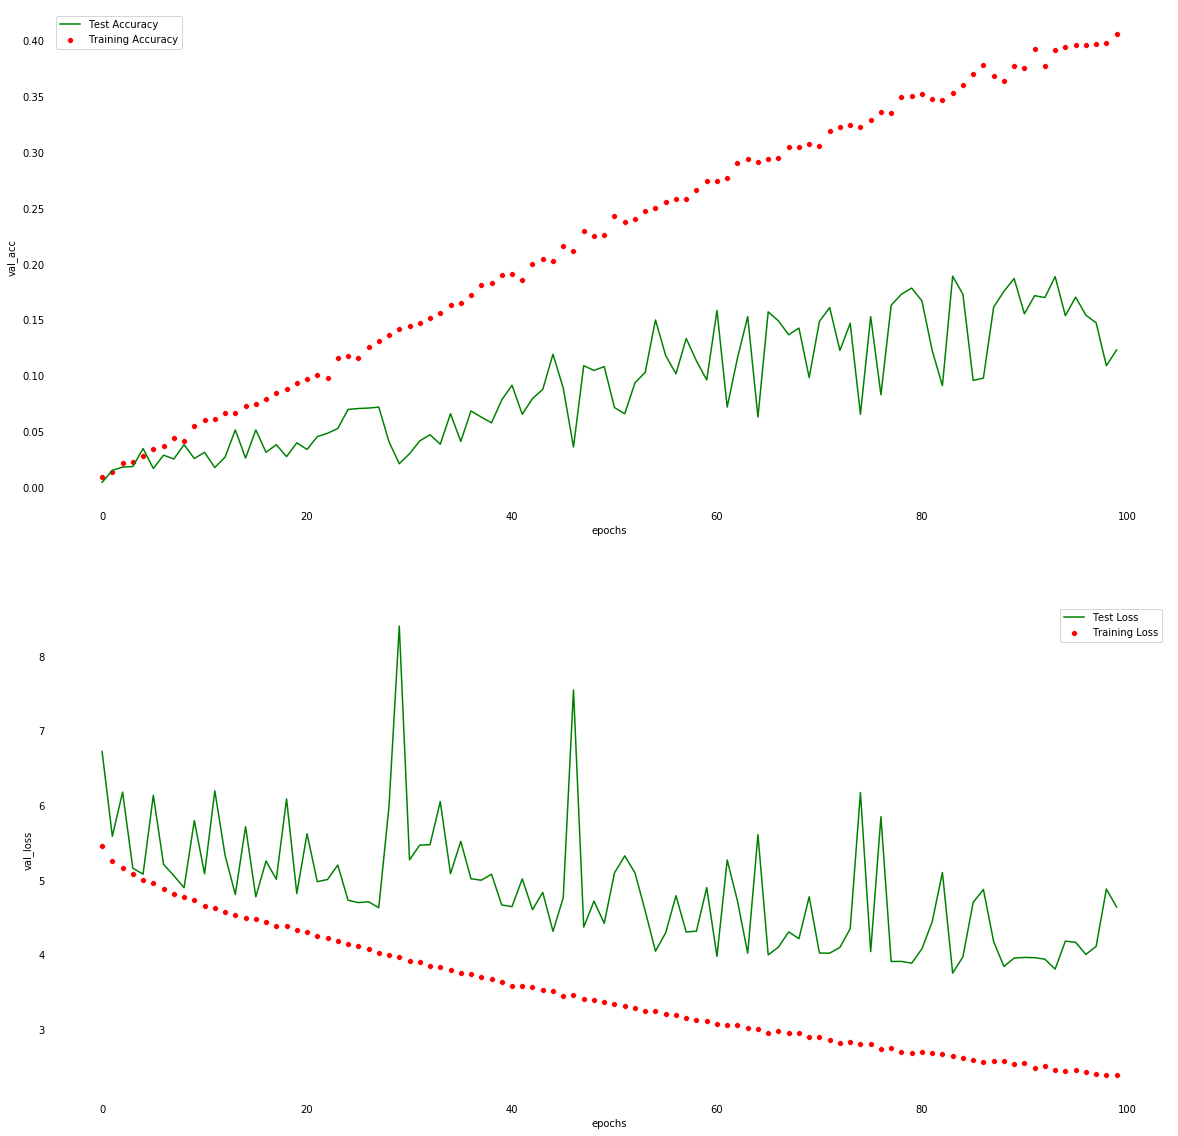

In [7]:
import seaborn as sns
sns.set_style({'xtick.bottom':False,
               'ytick.left':False,
               'axes.spines.bottom': False,
               'axes.spines.left': False,
               'axes.spines.right': False,
               'axes.spines.top': False})

ig,(ax,ax1) = plt.subplots(nrows=2,ncols=1,figsize=(20,20))
sns.scatterplot(x='epochs',y='acc',data=vals,ax=ax,color='r')
sns.lineplot(x='epochs',y='val_acc',data=vals,ax=ax,color='g')
sns.scatterplot(x='epochs',y='loss',data=vals,ax=ax1,color='r')
sns.lineplot(x='epochs',y='val_loss',data=vals,ax=ax1,color='g')
ax.legend(labels=['Test Accuracy','Training Accuracy'])
ax1.legend(labels=['Test Loss','Training Loss'])

In [ ]:
# for i in range(n_iterations):
#         print('\r{}/{}'. format(i, n_iterations))
#         #initilaize random hyperparameters
#         random_parameters = {K: random.sample(V, 1)[0] for K, V in parameters_grid.items()}
#         #create model with random hyperparameters
#         model = create_model(random_parameters)
#         opt = create_RMSprop_optimizer(random_parameters)
#         #compile model
#         model.compile(optimizer = opt, loss='categorical_crossentropy', metrics=['accuracy'])
#         #train model
#         epochs = 40
#         checkpointer = ModelCheckpoint(filepath='saved_models/model_weights.hdf5', verbose=1, save_best_only=True)
#         early_stopping = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 8)
#         history = model.fit(X_train, Y_train,
#                   callbacks = [checkpointer, early_stopping],
#                   validation_split = 0.33,
#                   epochs=epochs, batch_size = 20, verbose=1)
#         #compare current min validation loss with global min validation loss
#         current_min_val_loss = np.min(history.history['val_loss'])
#         if(current_min_val_loss < global_min_val_loss):
#             global_min_val_loss = current_min_val_loss
#             #save the best model so far
#             model.load_weights('saved_models/model_weights.hdf5')
#             model.save('saved_models/best_model.h5')
#             print('saving new best model, val_loss = {}'.format(current_min_val_loss))
#             #save best hyperparameters
#             best_hyperparameters = random_parameters